In [1]:
#Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

The data was downloaded from Kaggle https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers.

It is fictional data about a bank and its customers and whether they churned ('Exited') or not. Churning is when a customer stops using product or services provide by a company, so basically, it is when companies lose customers. 

**'Exited'** is the target variable. You would want to build a model that will predict whether a potential customer will churn or not.
If 'Exited'=1 , that is yes, which means that the customer churned. If it is 0, it means the customer did not churn.

We will use this data to create a prediction model that will help predict whether a potential customer will churn or not. 

**More information about the data:**

**RowNumber:** Order number of each data point	

**CustomerId:** Unique identifier for each customer

**Surname:** Customer's last name

**CreditScore:** Credit measuring system , typically ranges from 300 to 850

**Geography:** Location/region

**Gender:** Male=0, Female=1

**Age:** Age of customer, integer

**Tenure:** How long(in years) the customer has been with the bank

**Balance:** Account balance of the customer

**NumOfProducts:** Number of product that the customer has with the bank, could be things like debit cards, credit cards, mortgage loan etc...	

**HasCrCard:** If the customer has a credit card, No=0, Yes=1

**IsActiveMember:** If the member is active in using the services, No=0, Yes=1

**EstimatedSalary:** Customer's estimated salary at the time

**Exited:** if the customer churned/ or not, No=0, Yes=0


In [2]:
#Load dataset
churn_data = pd.read_csv("Churn_Modelling.csv.xls")

churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Get some statistics about your different variables
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Checking for null variables 

churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#making sure they are no duplicated entries as that might negatively affect your model
churn_data.duplicated().sum()

0

Now, let's do some explorative data analysis to get a sense of the data that we are working with.

In [7]:
#Let's see the count for churns and not churns
churns= churn_data['Exited'].value_counts()
churns

0    7963
1    2037
Name: Exited, dtype: int64

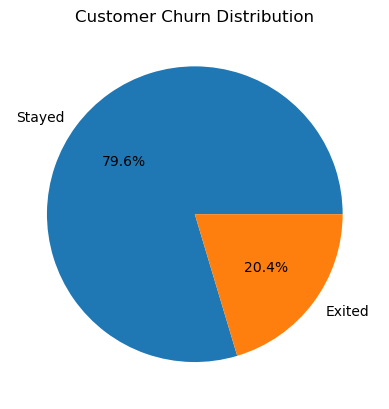

In [8]:
plt.pie(churns,autopct='%1.1f%%', labels=['Stayed', 'Exited'])
plt.title('Customer Churn Distribution')
plt.show()

Based on the data we provided, 79.6% of the customers were retained while 20.4% of the customers left.

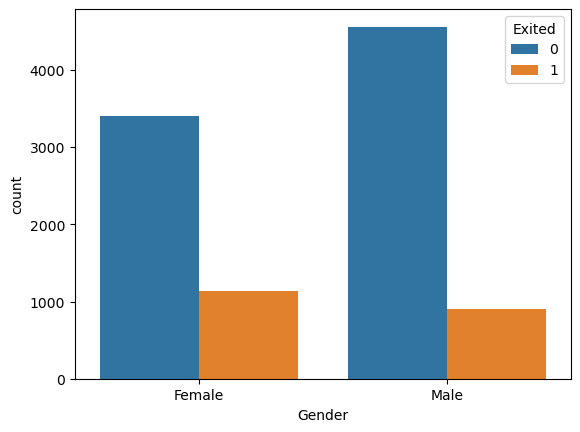

In [9]:
#plot comparing churn based on gender
sns.countplot(x="Gender", data=churn_data, hue='Exited')
plt.show()

Just by looking at this, you can get a sense of which gender is most likely to churn. Females are most likely tyo churn more their male counterpart.
We can calculate the Churn rate to see what the numbers look like.

In [10]:
gender_rate = churn_data.groupby('Gender')['Exited'].mean()
gender_rate

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

So, we can see that the rate for Female is 25.1% while the rate for male is 16.5%. 

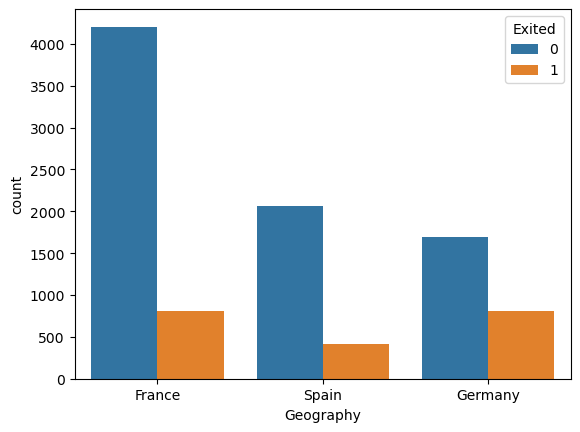

In [11]:
#how does the churn rate compare across regions?
sns.countplot(x="Geography", data=churn_data, hue='Exited')
plt.show()

In [12]:
geography_rate = churn_data.groupby('Geography')['Exited'].mean()
geography_rate

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

People living in Germany are more liley to churn as their churning rate is 32.4% and is higher than in the other regions.

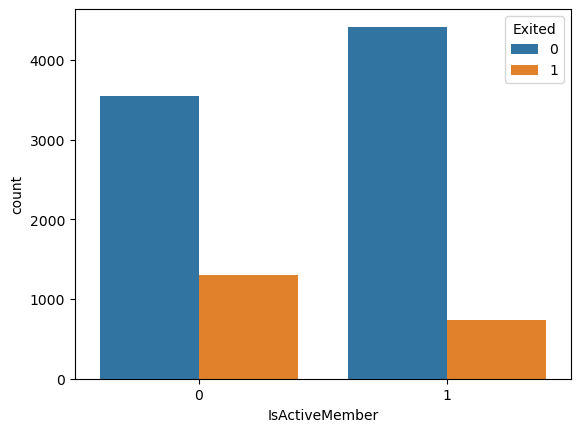

In [13]:
sns.countplot(x="IsActiveMember", data=churn_data, hue='Exited')
plt.show()

In [14]:
active_rate = churn_data.groupby('IsActiveMember')['Exited'].mean()
active_rate

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

We can see that members that are not active are more likely to churn than those who are.

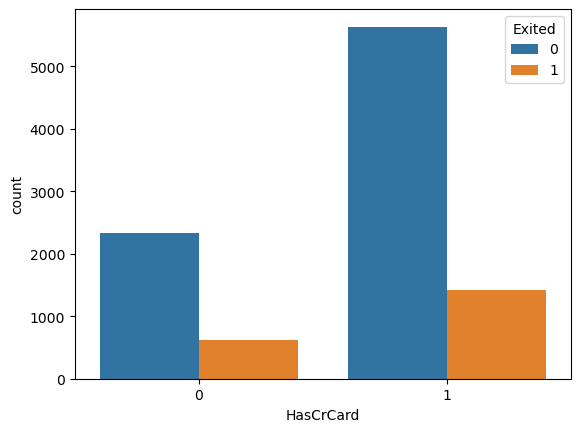

In [15]:
sns.countplot(x="HasCrCard", data=churn_data, hue='Exited')
plt.show()

In [16]:
creditcard_rate = churn_data.groupby('HasCrCard')['Exited'].mean()
creditcard_rate

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64

Based on these rates, it does not seem like having a creadit card or not significantly affects the rate of churning. 

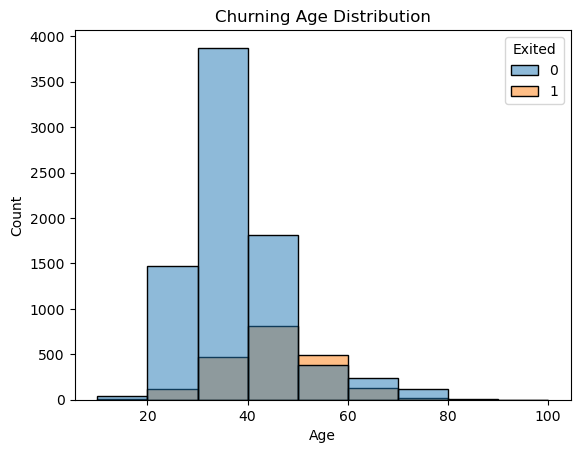

In [17]:
#What is the age distribution of our customers
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(data=churn_data, x='Age', hue='Exited', bins=bins)
plt.title('Churning Age Distribution')
plt.show()

The age distribution graph showed here gives us an idea of what age group  are likely to churn or not. 
Just by looking at the graph, I can see that the customers that are most likely to churn are those in the age range of 50 to 60, followed by 40 to 50. 

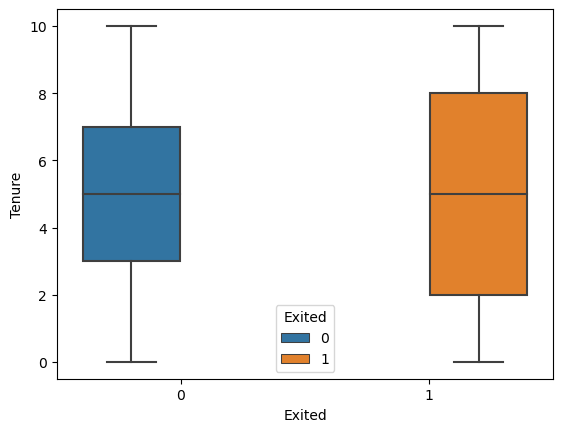

In [18]:
sns.boxplot(data=churn_data, y='Tenure', x='Exited', hue='Exited')
plt.show()

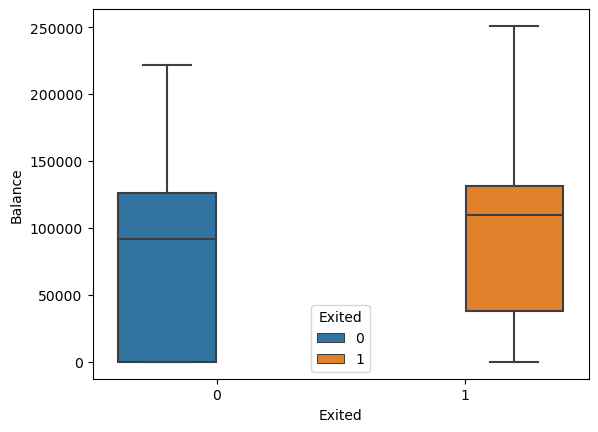

In [19]:
sns.boxplot(data=churn_data, y='Balance', x='Exited', hue='Exited')
plt.show()

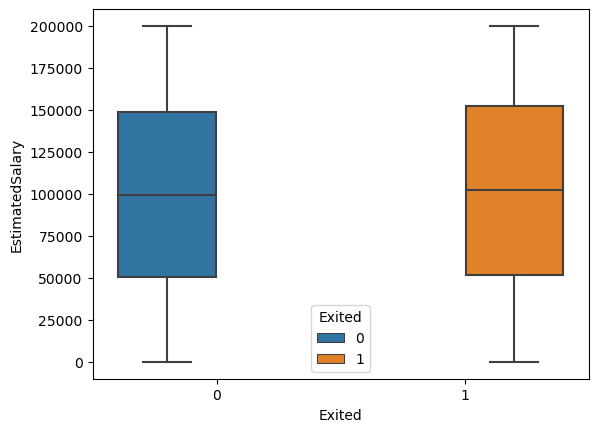

In [20]:
sns.boxplot(data=churn_data, y='EstimatedSalary', x='Exited', hue='Exited')
plt.show()

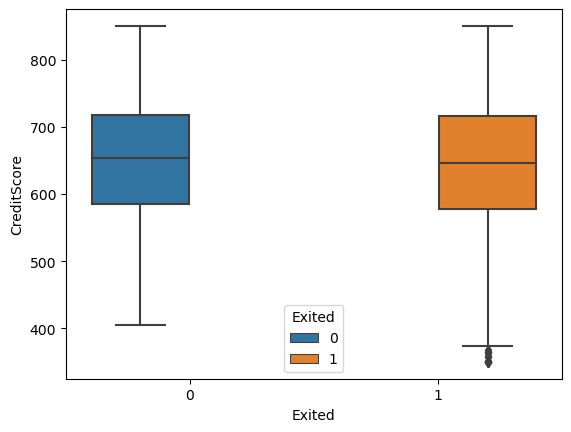

In [21]:
sns.boxplot(data=churn_data, y='CreditScore', x='Exited', hue='Exited')
plt.show()

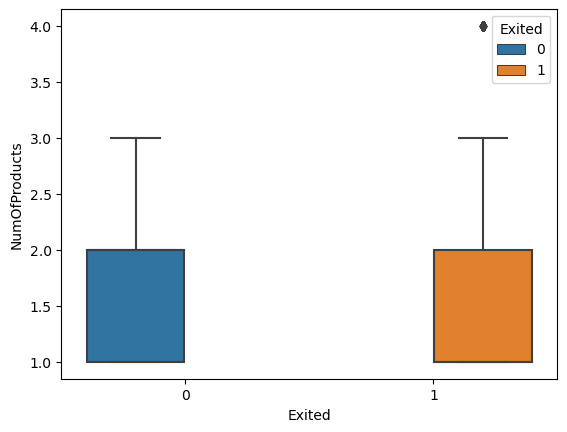

In [22]:
sns.boxplot(data=churn_data, y='NumOfProducts', x='Exited', hue='Exited')
plt.show()

From the above data exploratrion, the bank can find ways to incentivize at risk customers. 

We now have a sense of what our data visualization looks like, now let's build a model.

We will build a logistic regression model to predict whether or not a customer will churn. 

In [23]:
#replace some categorical variables with dummy variables
churn_data['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [24]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [25]:
#remove columns that are not needed
churn_data.drop(columns=['RowNumber','CustomerId', 'Surname', 'Geography'], inplace=True)
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


In [26]:
#define your X (features) and y (response) data
X = churn_data.drop(['Exited'], axis = 1)
y= churn_data['Exited']

In [27]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#create and fit model 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
#predict
y_pred = log_reg.predict(X_test)

In [30]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.8005


In [31]:
import joblib
joblib.dump(log_reg, 'finalmodel.pkl', compress = 1)

['finalmodel.pkl']

In [33]:
# Create Data Frame
data = pd.DataFrame({'CreditScore': [797], 'Gender': [1],
     'Age': [26], 'Tenure': [1], 'Balance': [13560.89],
     'NumOfProducts': [5], 'HasCrCard': [0], 'IsActiveMember': [1], 
     'EstimatedSalary': [60056.77]})

# open file
file = open("finalModel.pkl", "rb")

# load trained model
trained_model = joblib.load(file)

# predict
prediction = trained_model.predict(data)
prediction

if prediction == 0:
    print("the customer will not churn ")
else: print("the customer will churn ")

the customer will not churn 
